# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from agent_config import AgentConfig
from plots import Plots
from train_runner import TrainRunner
from test_runner import TestRunner

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 5. Training Agent

To train the agent we are going to run the python class TrainRunner from train_main.py. The TrainRunner will train the networks and save them to files agent_<agent_index>_actor.pt and agent_<agent_index>_critic.pt. We will use single agent environment.

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent_config = AgentConfig(device=device,
                           buffer_size=int(1e6),
                           batch_size=64,
                           gamma=0.99,
                           tau=1e-3,
                           lr_actor=5e-4,
                           lr_critic=5e-4,
                           eps=1.0,
                           update_every=20,
                           agent_count=2,
                           state_size=24,
                           action_size=2,
                           random_seed=42)

### 6. Hyperparameters

- buffer_size: 1000000
- batch_size:  64
- gamma:       0.99
- tau:         1e-3
- lr_actor:    5e-4,
- lr_critic:   5e-4,
- eps:         1.0
- update_every: 20
- agent_count: 2
- state_size:  24
- action_size: 2
- random_seed: 42

In [3]:
trainer = TrainRunner(config=agent_config,
                      env_path="./Tennis_Linux/Tennis.x86_64",
                      checkpoint_path="./checkpoints")
scores = trainer.run()
trainer.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Episode 50	Average Score: 0.00
Episode 100	Average Score: 0.01
Episode 150	Average Score: 0.01
Episode 200	Average Score: 0.01
Episode 250	Average Score: 0.01
Episode 300	Average Score: 0.01
Episode 350	Average Score: 0.01
Episode 400	Average Score: 0.03
Episode 450	Average Score: 0.04
Episode 500	Average Score: 0.04
Episode 550	Average Score: 0.01
Episode 600	Average Score: 0.00
Episode 650	Average Score: 0.01
Episode 700	Average Score: 0.01
Episode 750	Average Score: 0.00
Episode 800	Average Score: 0.01
Episode 850	Average Score: 0.03
Episode 900	Average Score: 0.05
Episode 950	Average Score: 0.07
Episode 1000	Average Score: 0.08
Episode 1050	Average Score: 0.07
Episode 1100	Average Score: 0.08
Episode 1150	Average Score: 0.11
Episode 1200	Average Score: 0.12
Episode 1250	Average Score: 0.13
Episode 1300	Average Score: 0.14
Episode 1350	Average Score: 0.12
Episode 1400	Average Score: 0.11
Episode 1450	Average Score: 0.10
Episode 1500	Average Score: 0.09
Episode 1550	Average Score: 0.

### 7. Training Scores

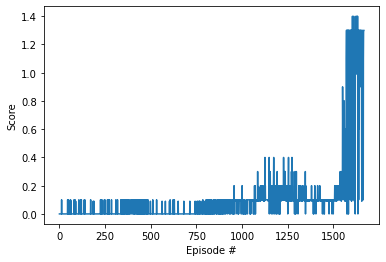

In [4]:
Plots().plot_scores(scores)

### 8. Testing the agent

In [ ]:
TestRunner(agent_config,
           env_path="./Tennis_Linux/Tennis.x86_64",
           checkpoint_path="./checkpoints").run()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


![Tested Agent](tennis-trained-agent-demo.gif)

### 9. Implementation details

For solving The Tennis environment I've selected MADDPG method - Multi Agent DDPG from the [paper](https://arxiv.org/pdf/1706.02275.pdf).

  MADDPG is adaptation of DDPG to a multi-agent domain. The DDPG is well described in the report - [continous control project](https://github.com/ktatarnikov/continuous_control/blob/master/Report.ipynb). Below I briefly mention keypoints.
 
  DDPG implements actor-critic schema where both actor and critic are DQN style networks that have local/target pairs. Actor network learns what action action to take given the environment state and critic network is used to tell how good is the action taken and how to improve. Local/Target networks are required to help giving consistent targets and stabilize learning process.
  
  **How is DDPG adopted to multi agent domain.** 
  
  There are multiple (two) agents instead of one that act adversarially against each other, learn and improve. There are several problems preventing the use of just 2 independent DDPG agents against each other straight away - the evolution of agent policies with the time and the non stationarity of environment from the perspective of single agent. MADDPG is a an approach to tackle these issues. 
  
 The approach has the following features: 
 - policy network of an agent remains the same, it gets agent observations as input and produce agent action. (In order to allow exploration - a bit of noise added the the action in the same way as with DDPG agent)
 - The learning is centralized meaning that the critic network gets states and actions of all agents as input. Thus, the critic network takes into account policies of other agents. The network itself is dublicated in each agent. During execution the critic network is not used. (please see the diagram below).
 
![MADDPG Algorithm](./MADDPG.png?=100px)

(Image source: [Multi-Agent Actor-Critic for Mixed
Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf))

From the code perspective I have managed to reuse the most of the agent code from my [continous-control](https://github.com/ktatarnikov/continuous_control) project. Thus, the DDPGAgent, experience ReplayBuffer, random noise (OUNoise), training and testing loops are almost the same. What is different? it is the new MultiAgent class that combines multiple agents and executes policy learning.




### 10. Future Improvements
- Replay buffer prioritization can help sampling the most important transitions
- Using different approach like PPO or A2C